In [37]:
# coding: utf-8
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import sys
import numpy as np

In [6]:
#get data
data = pd.read_csv('12231416.csv', names = ['ph', 'time', 'date', 'x_pos', 'y_pos'])
rest_data = data.loc[data['y_pos'] != 0]
rest_data.shape

(200, 5)

    Convert times into delta time objects

In [86]:
start_times = [datetime.time(23, 41, 0), datetime.time(5, 41, 0), datetime.time(11, 41, 0), datetime.time(17, 41, 0)]
time_series = {time: {} for time in start_times}

start_hours = [time.hour for time in start_times]
times_finder = {start_hours[i]: start_times[i] for i in range(0, len(start_times))}

#test
#get time objects into time series
for i in range(0, 200):
    date_string = rest_data.iloc[i]['date'] + " " + rest_data.iloc[i]['time']

    this_time = datetime.datetime.strptime(date_string, "%Y-%m-%d %H:%M:%S")
  
    this_hour = this_time.hour
    try:
        this_key = times_finder[this_hour]
    except KeyError:
        try:
            this_key = times_finder[this_hour + 1]
        except KeyError:
            try:
                this_key = times_finder[this_hour - 1]
            except KeyError: #then this is midnight, and this_hour should be 23
                this_key = times_finder[23]
            
        
        
    #figure out if this time series exists already, the keys will be by date
    #nested key is the date of the trial
    this_date = this_time.date()
    
    if this_hour == 0: #if it's that midnight trial, then the timeseries key will be the day before
        this_date = this_time.date() - datetime.timedelta(1)

    try:
        time_series[this_key][this_date].append(this_time)
    except KeyError:
        time_series[this_key][this_date] = [this_time]

print(time_series[datetime.time(23, 41, 0)].keys())

dict_keys([datetime.date(2016, 12, 25), datetime.date(2016, 12, 24), datetime.date(2016, 12, 27), datetime.date(2016, 12, 26), datetime.date(2016, 12, 23)])


In [59]:
#voila exactly 10 trials each
print(time_series[datetime.time(23, 41, 0)][datetime.date(2016, 12, 24)])

[datetime.datetime(2016, 12, 24, 23, 55, 14), datetime.datetime(2016, 12, 24, 23, 57, 5), datetime.datetime(2016, 12, 24, 23, 58, 58), datetime.datetime(2016, 12, 25, 0, 0, 52), datetime.datetime(2016, 12, 25, 0, 2, 48), datetime.datetime(2016, 12, 25, 0, 4, 43), datetime.datetime(2016, 12, 25, 0, 6, 36), datetime.datetime(2016, 12, 25, 0, 8, 30), datetime.datetime(2016, 12, 25, 0, 10, 24), datetime.datetime(2016, 12, 25, 0, 12, 20)]


See what the drift is between different time measurements after start

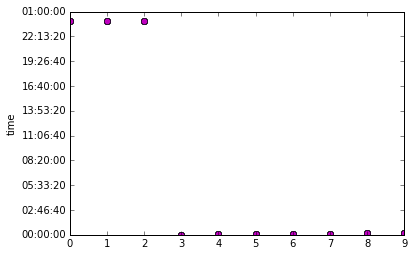

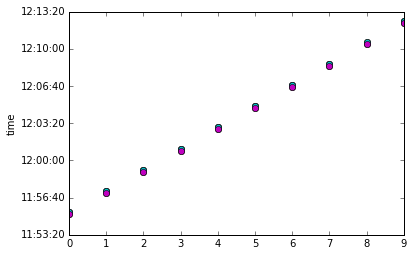

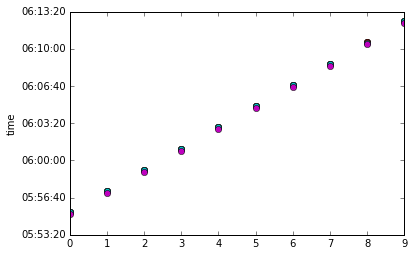

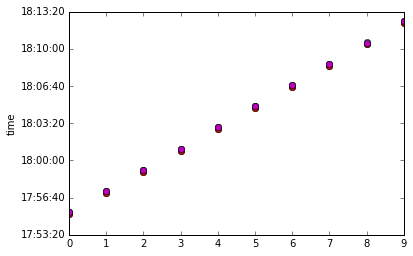

In [87]:
%matplotlib inline
#sort the datapoints
for trial, day_dict in time_series.items():
    for day, datetime_list in day_dict.items():
        datetime_list.sort()
        y = [x.time() for x in datetime_list]
        x = range(0, len(y))
        plt.plot(x, y, 'o')
        
        #modify data structure to make easier to transport into df
        #day_dict[day] = {i + 1: datetime_list[i] for i in range(0, len(datetime_list))}
        
       
    plt.show()

In [105]:
#see average time it takes between trials
time_collection = {}
start_collection = {key: [] for key in time_series.keys()}

trial_count = 1
for key, date_dict in time_series.items():
    for trial, time_list in date_dict.items():
        time_collection[trial_count] = [(time_list[i+1] - time_list[i]).seconds for i in range(0, len(time_list) - 1)]
        start_collection[key].append(time_list[0].time())
        trial_count += 1
time_df = pd.DataFrame(time_collection)
print(trial_count)
print(time_df.shape)
time_df.head()
time_df.to_csv('time_between_trials.csv')

#print(time_collection[0])
#print(start_collection[list(start_collection.keys())[0]])

21
(9, 20)


In [106]:
start_df = pd.DataFrame(start_collection)
start_df.head()

start_df.to_csv("trial_starts")